EDA 

In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Dataset
file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)

# Vista general
print("Dimensiones:", df.shape)
df.head()


Dimensiones: (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
#Información general
df.info()

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nEstadísticas numéricas:")
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Distribución de la variable objetivo:
NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


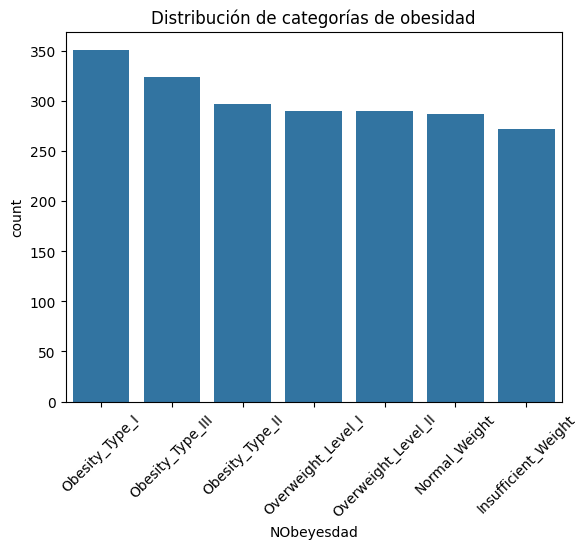

In [4]:
#Analisis de la variable objetivo
target_col = "NObeyesdad"

print("Distribución de la variable objetivo:")
print(df[target_col].value_counts(normalize=True))

sns.countplot(data=df, x=target_col, order=df[target_col].value_counts().index)
plt.title("Distribución de categorías de obesidad")
plt.xticks(rotation=45)
plt.show()

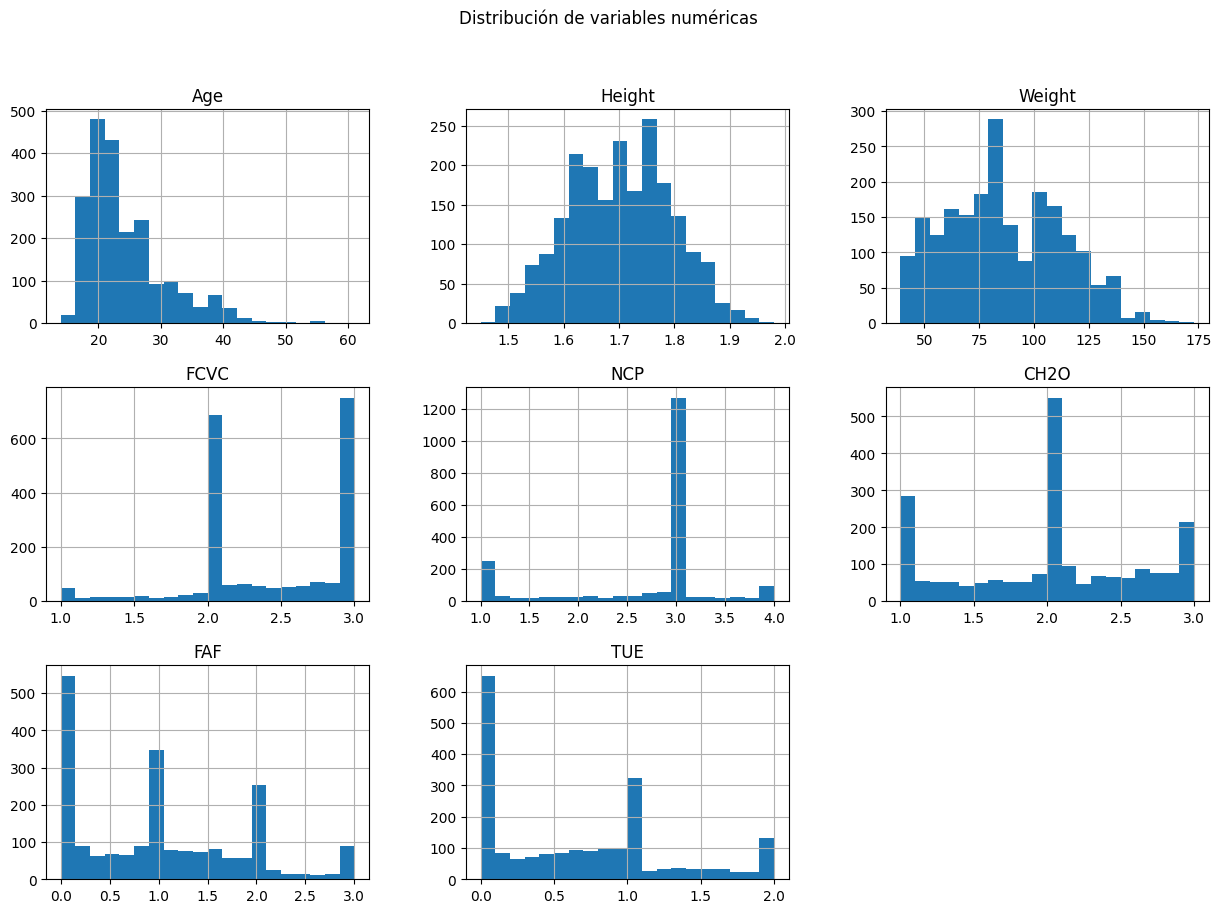

In [5]:
#Distribución de variables numéricas
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribución de variables numéricas")
plt.show()

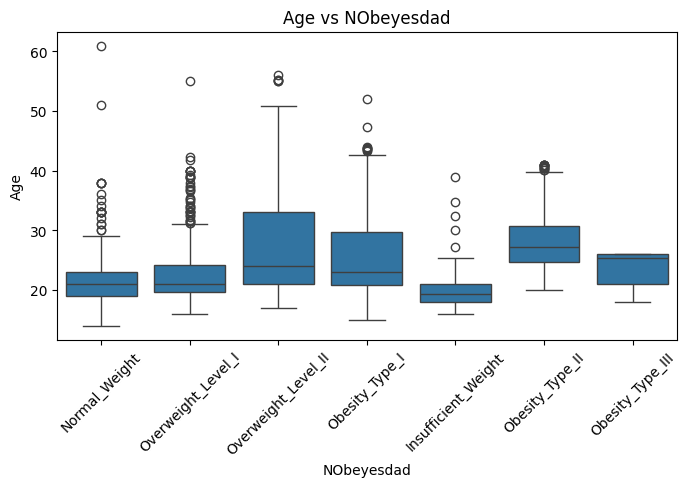

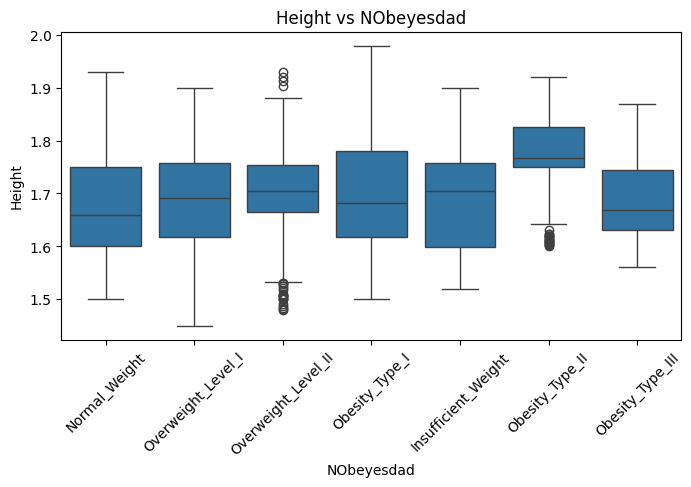

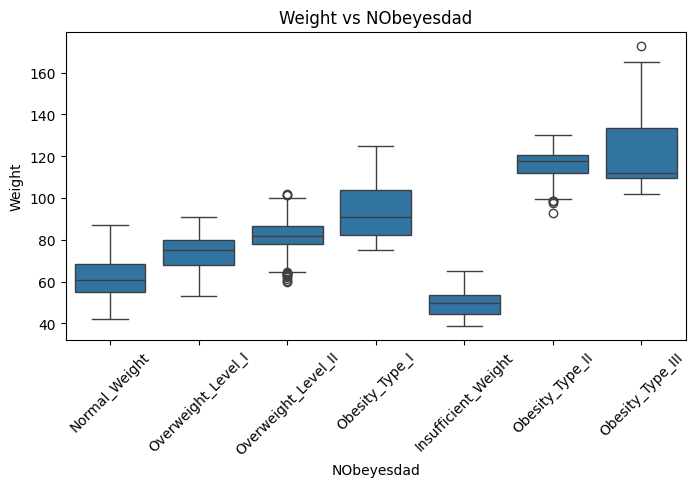

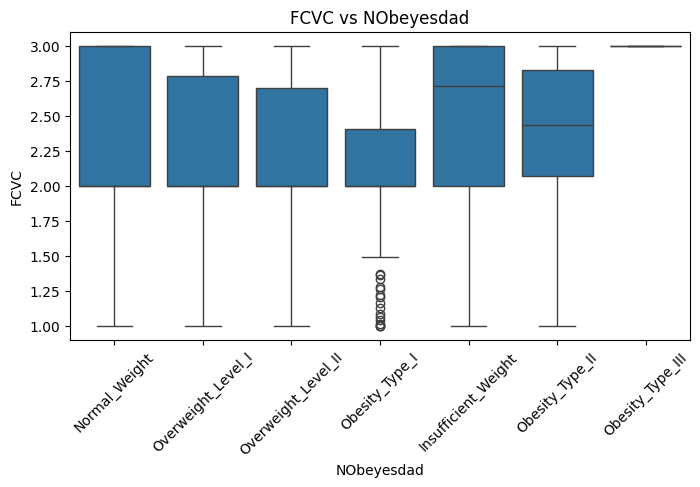

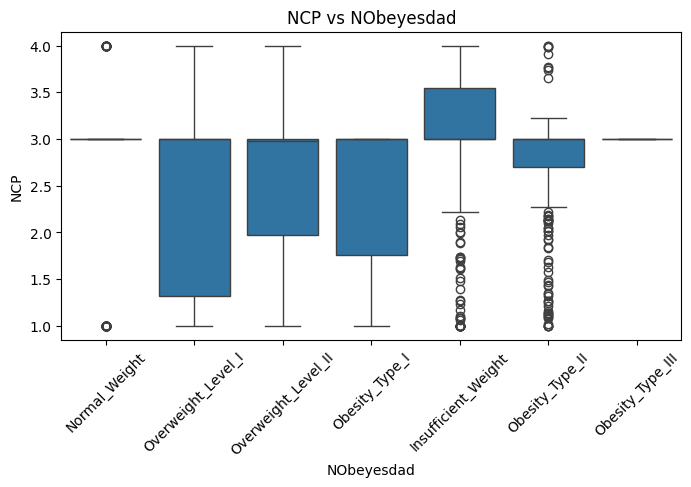

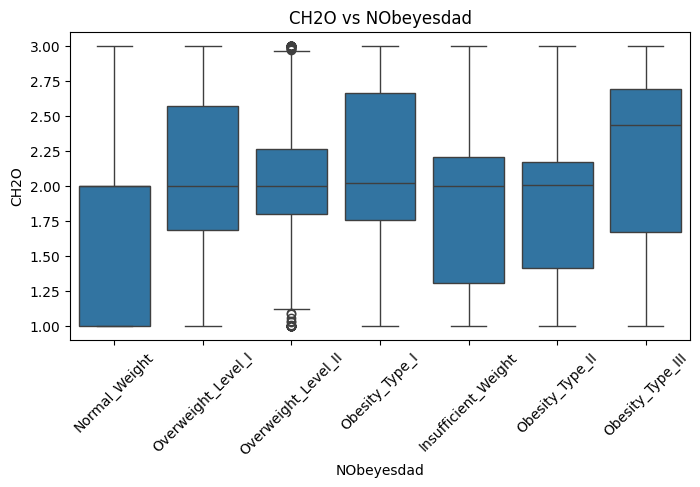

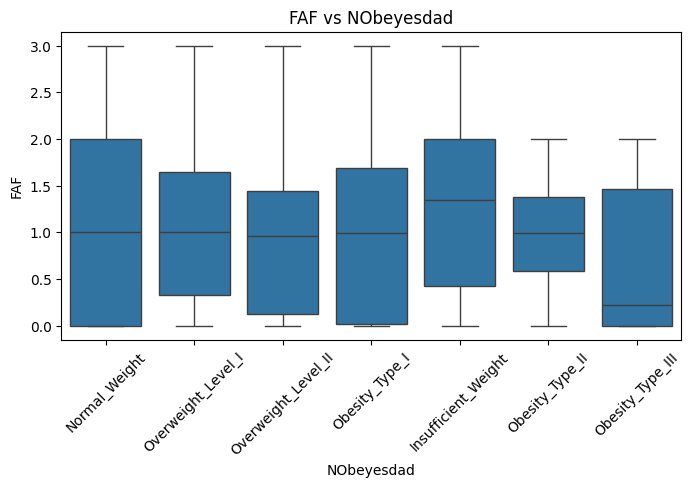

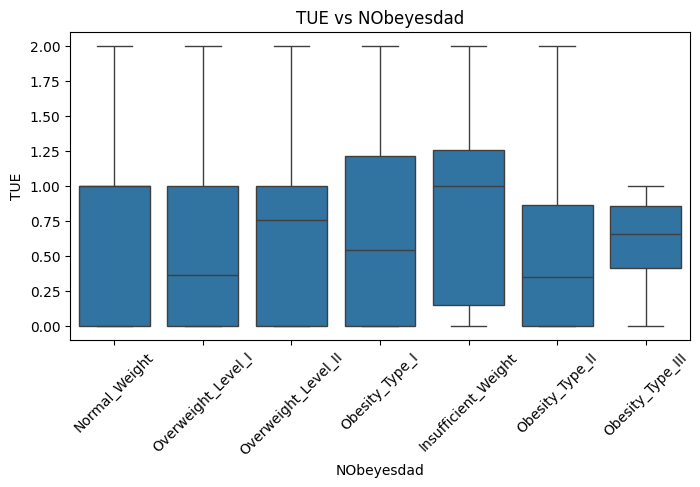

In [6]:
#Relación entre variables numéricas y targe
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=target_col, y=col)
    plt.title(f"{col} vs {target_col}")
    plt.xticks(rotation=45)
    plt.show()

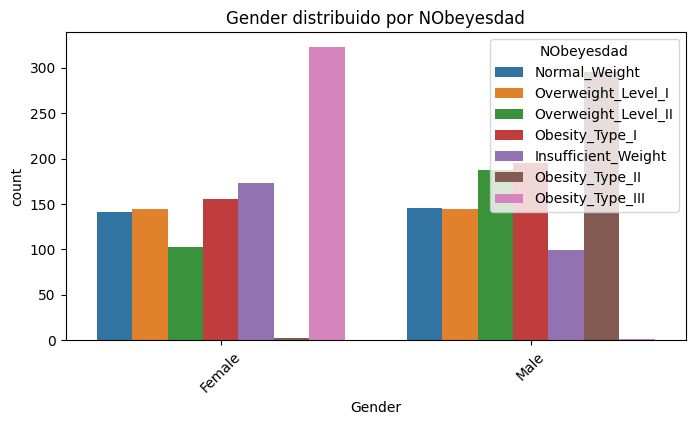

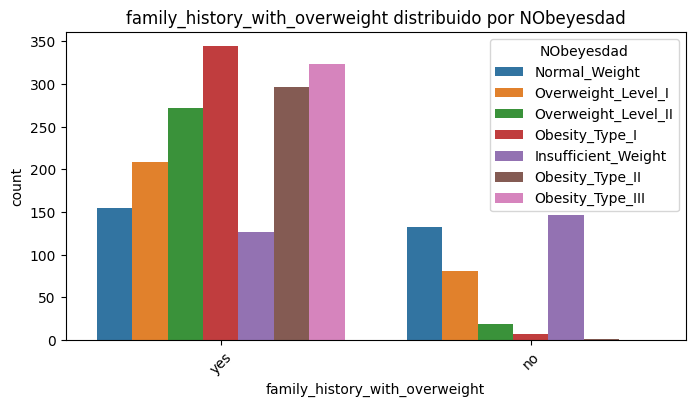

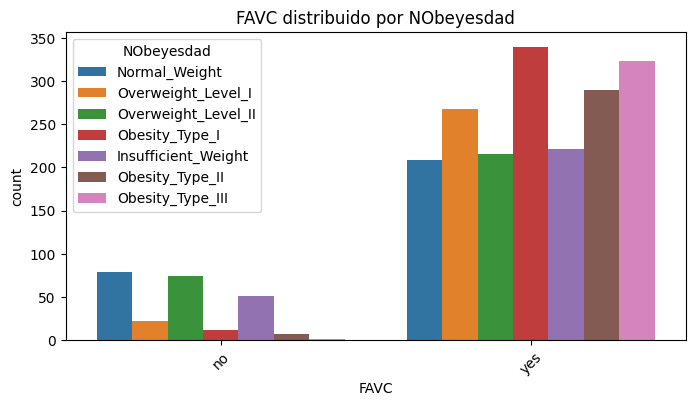

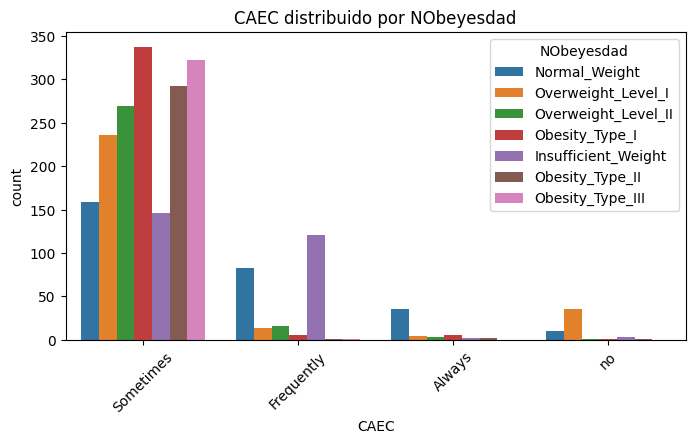

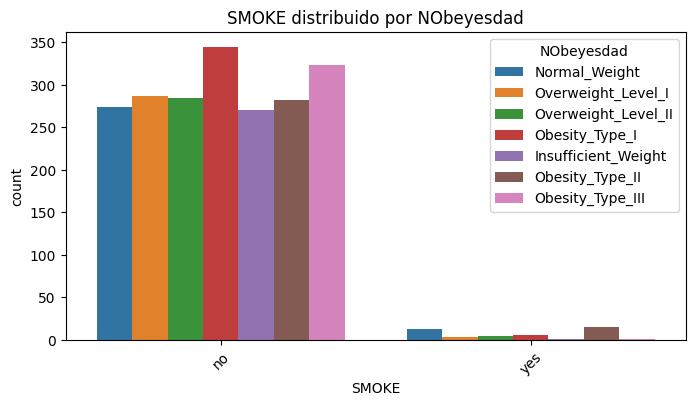

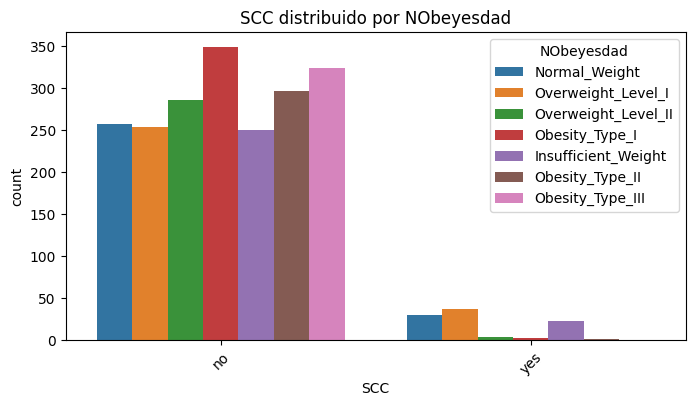

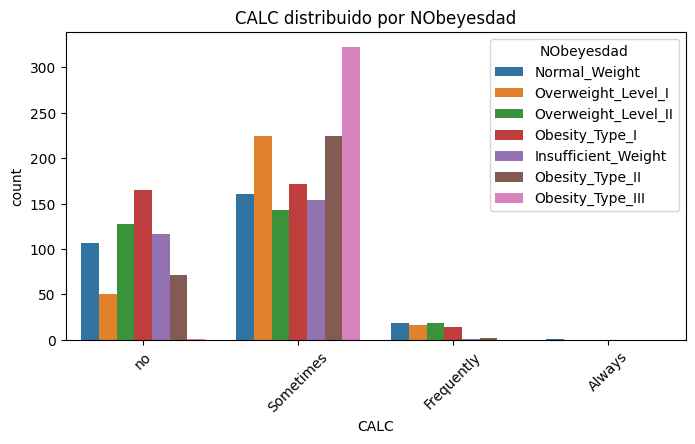

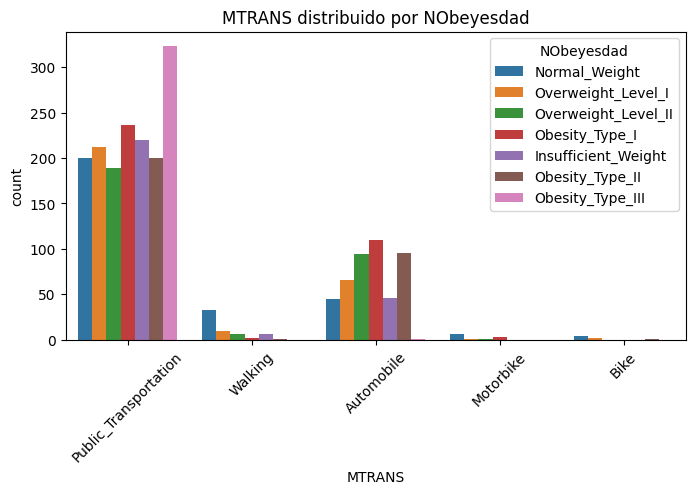

In [7]:
#Análisis de variables categóricas
cat_cols = df.select_dtypes(exclude=np.number).columns.drop(target_col)

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue=target_col)
    plt.title(f"{col} distribuido por {target_col}")
    plt.xticks(rotation=45)
    plt.show()

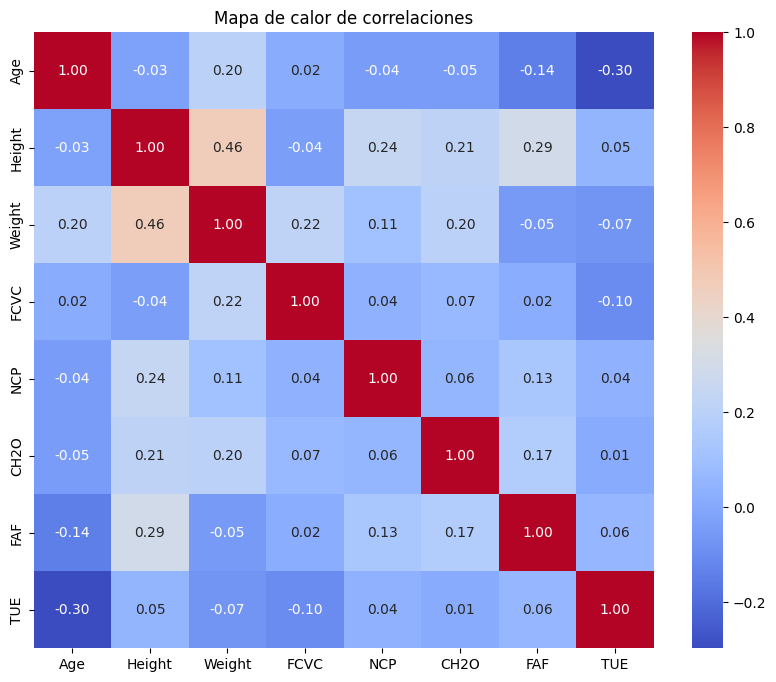

In [8]:
#Correlación entre variables numéricas

corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

**Analisis de varaibles categoricas**

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency

In [ ]:
#Preparar variables categóricas

cat_vars = df.select_dtypes(include=["object", "category"]).columns
num_vars = df.select_dtypes(include=np.number).columns

In [ ]:
#Encoding Label (rápido y compacto, mejor para correlación)

df_encoded = df.copy()
le = LabelEncoder()
for col in cat_vars:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [14]:
#Calcular Cramér's V para categóricas

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


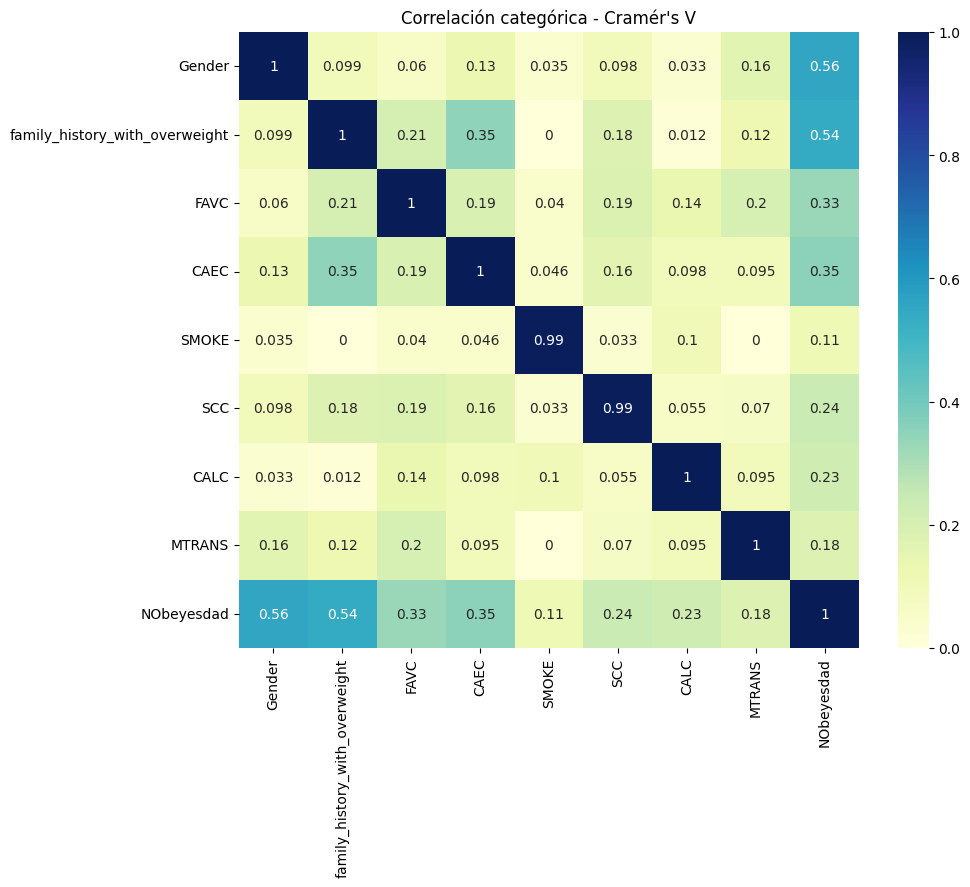

In [16]:
#Matriz de correlación categórica

cramers_results = pd.DataFrame(index=cat_vars, columns=cat_vars, dtype=float)
for col1 in cat_vars:
    for col2 in cat_vars:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(10,8))
sns.heatmap(cramers_results, annot=True, cmap="YlGnBu")
plt.title("Correlación categórica - Cramér's V")
plt.show()

C:\Users\juanp\AppData\Local\Temp\ipykernel_15256\2430504527.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_df.values, y=mi_df.index, palette="viridis")


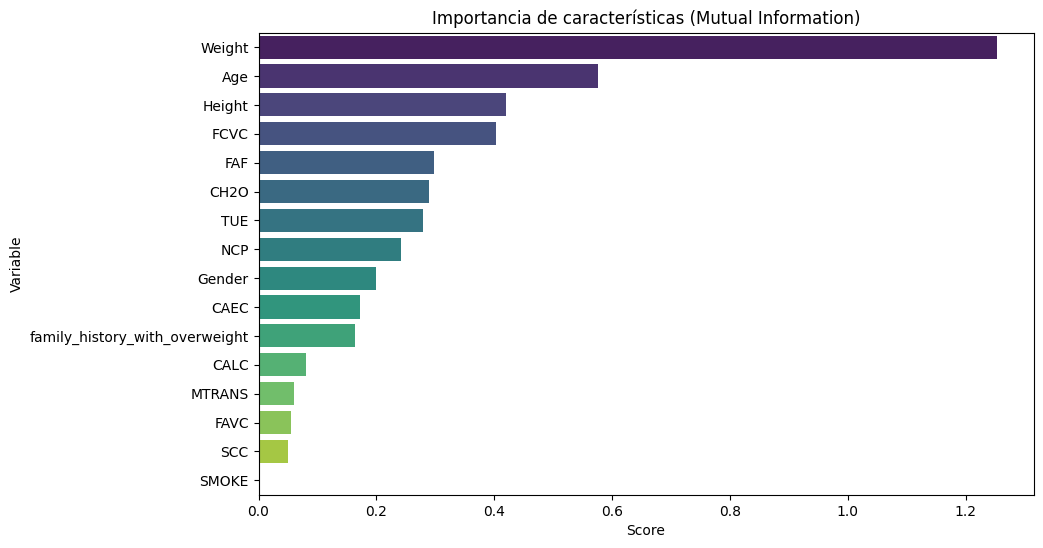

In [18]:
target = "NObeyesdad"  #variable objetivo

# Mutual Information (funciona con numéricas + categóricas)
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
mi_scores = mutual_info_classif(X, y, discrete_features="auto")

mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=mi_df.values, y=mi_df.index, palette="viridis")
plt.title("Importancia de características (Mutual Information)")
plt.xlabel("Score")
plt.ylabel("Variable")
plt.show()

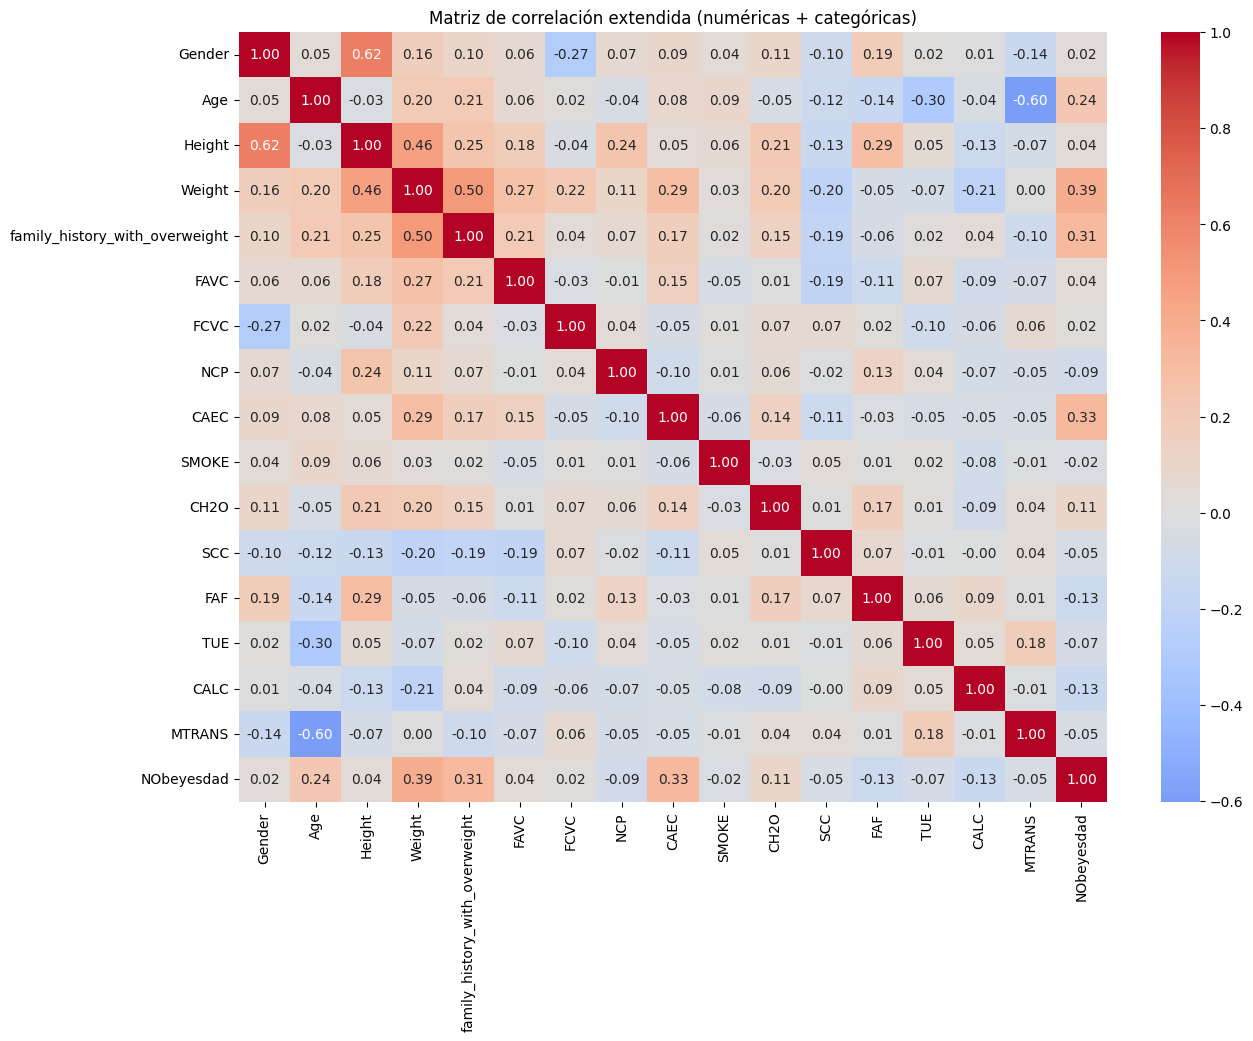

In [20]:
# Matriz extendida (Pearson para numéricas, Cramér's V para categóricas)
combined_corr = df_encoded.corr()

plt.figure(figsize=(14,10))
sns.heatmap(combined_corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Matriz de correlación extendida (numéricas + categóricas)")
plt.show()

# Conclusiones EDA – Obesity Dataset

## 1. Dimensiones y calidad de datos
- Tamaño: 2,111 filas × 17 columnas.  
- Tipos de datos: 9 categóricas y 8 numéricas → mezcla equilibrada.  
- Valores nulos: 0 → dataset completo y limpio (no requiere imputación básica).  

---

## 2. Variable objetivo (`NObeyesdad`)
- Distribución balanceada:  
  - Las clases van de 12.9% a 16.6% cada una.  
  - Ninguna categoría domina → no hay un problema fuerte de desbalanceo.  

---

## 3. Variables numéricas
- Edad (Age): Media ≈ 24 años, rango 14–61 → población joven-adulta con pocos extremos.  
- Altura (Height): Media ≈ 1.70 m, rango 1.45–1.98 m → valores realistas y consistentes.  
- Peso (Weight): Media ≈ 86 kg, rango 39–173 kg → bastante dispersión, adecuado para clasificar niveles de obesidad.  
- FCVC (Frecuencia de consumo de verduras): Promedio ≈ 2.4 en escala 1–3 → consumo moderado-alto.  
- NCP (Número de comidas principales): Promedio ≈ 2.7 en escala 1–4 → mayoría hace 3 comidas diarias.  
- CH2O (Consumo de agua): Promedio ≈ 2 en escala 1–3 → hidratación media.  
- FAF (Actividad física): Promedio ≈ 1 en escala 0–3 → baja frecuencia de ejercicio.  
- TUE (Tiempo frente a pantallas): Promedio ≈ 0.65 en escala 0–2 → tendencia a uso moderado de dispositivos.  

La mayoría de las variables numéricas son escalas categorizadas cortas (1–3 o 0–3). Esto implica que serán más útiles como variables categóricas ordinales que como continuas.  

---

## 4. Correlaciones
- No se detectaron correlaciones fuertes (>0.5) entre las variables numéricas.  
- Esto implica que las variables aportan información relativamente independiente, lo cual es positivo para el modelado porque no hay redundancias fuertes.  

---

## Conclusiones principales
1. Dataset limpio, balanceado y con buena representación de clases → ideal para clasificación multiclase.  
2. Variables numéricas muestran dispersión realista; el peso es la más diferenciadora.  
3. Escalas ordinales (hábitos alimenticios y físicos) probablemente serán fuertes predictores.  
4. No hay correlaciones altas → se requiere analizar interacciones entre variables para entender patrones de obesidad.  
5. Población relativamente joven-adulta (promedio 24 años) → limita la generalización a otras edades, pero es consistente con el estudio.  

---

## Próximos pasos recomendados
- Análisis univariado con gráficas para validar interpretaciones.  
- Pruebas de importancia de variables (árboles de decisión / random forest).  
- Normalización o codificación adecuada (porque muchas son escalas discretas).  
